In [28]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Electricity Data

In [29]:
# Read the electricity generation data
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m12/lesson_1/datasets/electricity-generation.csv"
df_electricity = pd.read_csv(file_path)

# Display sample data
df_electricity.head()

,Year,Hydro,Thermal,Renewables,Total
0,2000,6610.0,614.0,0,7224
1,2001,6609.0,1250.0,0,7859
2,2002,5036.0,2237.0,0,7273
3,2003,3885.0,1996.0,0,5881
4,2004,5280.0,758.0,0,6038


<Axes: title={'center': 'Total electricity generation by year (GHz)'}, xlabel='Year', ylabel='Total'>

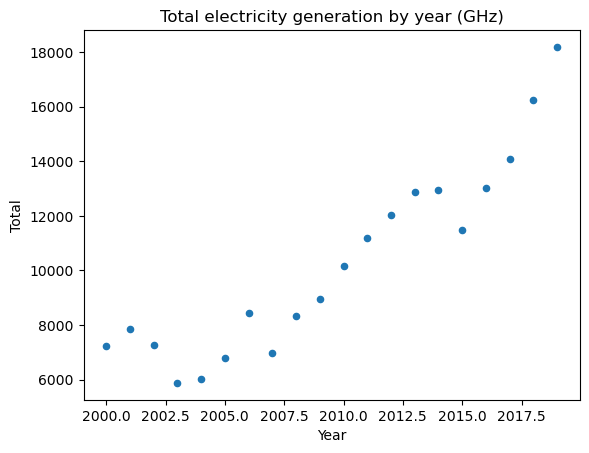

In [30]:
# Create a scatter plot with the total electricity generation by year
electricity_plot = df_electricity.plot.scatter(
    x="Year",
    y="Total",
    title="Total electricity generation by year (GHz)"
)
electricity_plot

In [31]:
# The first three years look like significant outliers.
# Reduce the DataFrame to just the "Year" and "Total" columns
# and only from 2003 onwards

df = pd.DataFrame(df_electricity.loc[df_electricity["Year"]>=2003,["Year","Total"]])\
        .reset_index().drop(columns="index")
df.head()

,Year,Total
0,2003,5881
1,2004,6038
2,2005,6788
3,2006,8430
4,2007,6978


## Prepare the Data to Fit the Linear Regression Model

In [32]:
# Create the X set
X = df["Year"].values.reshape(-1,1)


# Display sample data
X[:5]


array([[2003],
       [2004],
       [2005],
       [2006],
       [2007]])

In [33]:
# Create an array for the dependent variable y with the total electricity generation data
y = df["Total"].values



## Build the Linear Regression Model

In [34]:
# Create a model with scikit-learn
model = LinearRegression().fit(X, y)


In [35]:
# Fit the data into the model
model.fit(X, y)


LinearRegression()

In [36]:
# Display the slope
model.coef_


array([681.87990196])

In [49]:
# Display the y-intercept
model.intercept_


-1360458.3063725496

In [50]:
# Display the model's best fit line formula
print(f"y = {model.coef_[0]} * x + {model.intercept_}")


y = 681.8799019607845 * x + -1360458.3063725496


## Plot the Best Fit Line for the Electricity Generation Prediction Model

In [51]:
# Make predictions using the X set
predictions = model.predict(X)


In [54]:
# Create a copy of the original data
df_predictions = df.copy()


# Add a column with the predicted electricity values
df_predictions["Predicted"] = predictions


# Display sample data
df_predictions.head()


,Year,Total,Predicted
0,2003,5881,5347.137255
1,2004,6038,6029.017157
2,2005,6788,6710.897059
3,2006,8430,7392.776961
4,2007,6978,8074.656863


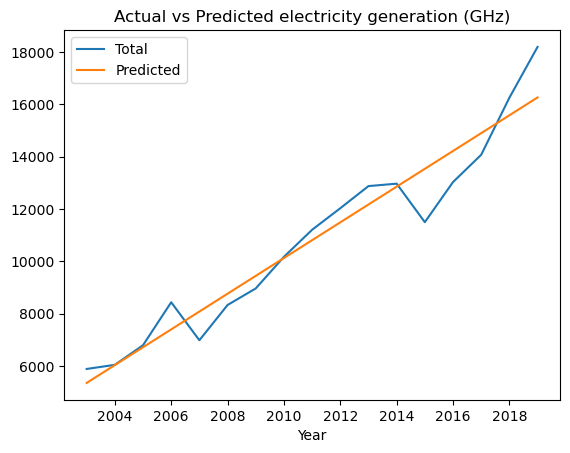

In [55]:
# Create a line plot of the predicted total electricity generation values
# and the actual values
predictions_plot = df_predictions.plot.line(
    x="Year",
    y=["Total", "Predicted"],
    title="Actual vs Predicted electricity generation (GHz)"
)


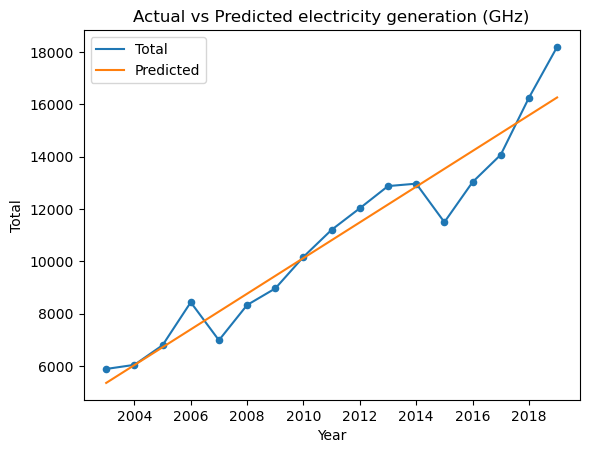

In [56]:
# Superpose the original data and the best fit line
# Create a scatter plot with the electricity information
# and superpose the best fit line
electricity_plot = df.plot.scatter(
    x="Year",
    y="Total",
    title="Total electricity generation by year (GHz)"
)


# Create a line plot of the predicted total electricity generation values
# and the actual values
predictions_plot = df_predictions.plot.line(
    x="Year",
    y=["Total", "Predicted"],
    title="Actual vs Predicted electricity generation (GHz)",
    ax=electricity_plot
)


## Make Manual Predictions

In [57]:
# Display the formula to predict the electricity generation for 2023
print(f"y = {model.coef_[0]} * 2023 + {model.intercept_}")


# Predict the electricity generation for 2023
model.predict([[2023]])


# Display the prediction
print(f"Predicted electricity generation for 2023: {model.predict([[2023]])[0]} GHz")


y = 681.8799019607845 * 2023 + -1360458.3063725496
Predicted electricity generation for 2023: 18984.735294117592 GHz


## Make Predictions Using the `predict` Function

In [58]:
# Create an array to predict electricity generation for the years 2020, 2021, 2022, and 2023
X_future = np.array([2020, 2021, 2022, 2023]).reshape(-1, 1)


# Format the array as a one-column array
X_future.reshape(-1, 1)


# Display sample data
X_future[:5]


array([[2020],
       [2021],
       [2022],
       [2023]])

In [59]:
# Predict electricity generation for the years 2020, 2021, 2022, and 2023
future_predictions = model.predict(X_future)


In [60]:
# Create a DataFrame for the predicted electricity generation
# for the years 2020, 2021, 2022, and 2023
df_future_predictions = pd.DataFrame({
    "Year": [2020, 2021, 2022, 2023],
    "Predicted": future_predictions
})


# Display data
df_future_predictions


,Year,Predicted
0,2020,16939.095588
1,2021,17620.975490
2,2022,18302.855392
3,2023,18984.735294


## Linear Regression Model Assessment

In [61]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Compute the metrics for the linear regression model
mse = mean_squared_error(y, predictions)


# Print relevant metrics.
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 845942.1521049981
